In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#폰트 지정 (맥)

from matplotlib import rc  
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False   

In [4]:
#데이터 불러오기

df_1 = pd.read_csv(r"LPOINT_BIG_COMP_01_DEMO.csv")
df_2 = pd.read_csv(r"LPOINT_BIG_COMP_02_PDDE.csv")
df_3 = pd.read_csv(r"LPOINT_BIG_COMP_03_COP_U.csv")
df_4 = pd.read_csv(r"LPOINT_BIG_COMP_04_PD_CLAC.csv")
df_5 = pd.read_csv(r"LPOINT_BIG_COMP_05_BR.csv")
df_6 = pd.read_csv(r"LPOINT_BIG_COMP_06_LPAY.csv")

/Users/ryujiwon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#데이터 합치기 Demo + 상품구매정보 + 상품분류정보

df_total = pd.merge(df_1, df_2, left_on='cust', right_on='cust', how='left')
df_total = pd.merge(df_total, df_4, left_on='pd_c', right_on='pd_c', how='left')

In [6]:
#null 확인

df_total.isnull().sum()

cust                 0
ma_fem_dv            0
ages                 0
zon_hlv              0
rct_no            2996
chnl_dv           2996
cop_c             2996
br_c            431497
pd_c              2996
de_dt             2996
de_hr             2996
buy_am            2996
buy_ct            2996
pd_nm             2996
clac_hlv_nm       2996
clac_mcls_nm      2996
dtype: int64

In [7]:
#결측치 제거

df_total = df_total.dropna(subset=['pd_c'])

In [8]:
df_total.isnull().sum()

cust                 0
ma_fem_dv            0
ages                 0
zon_hlv              0
rct_no               0
chnl_dv              0
cop_c                0
br_c            428501
pd_c                 0
de_dt                0
de_hr                0
buy_am               0
buy_ct               0
pd_nm                0
clac_hlv_nm          0
clac_mcls_nm         0
dtype: int64

In [9]:
#대분류 길이 확인


len(df_total['clac_hlv_nm'].value_counts())

60

In [10]:
df_total['clac_hlv_nm'].unique()

array(['스포츠패션', '속옷/양말/홈웨어', '건해산물', '여성의류', '냉동식품', '채소', '음료',
       '청소/세탁/욕실용품', '주류', '과자', '조미료', '과일', '대용식', '원예/애완', '완구',
       '패션잡화', '퍼스널케어', '침구/수예', '식기/조리기구', '양곡', '모바일', '아웃도어/레저',
       '화장품/뷰티케어', '남성의류', '테넌트/음식점', '병통조림', '헬스/피트니스', '문구/사무용품',
       '조리식품', '생활/주방가전', '유아동의류', '세제/위생', '주방잡화', '냉장식품', '생활/렌탈서비스',
       '기타(비상품)', '수산물', '축산물', '유제품', '유아식품', '건강식품', '구기/필드스포츠', '가구',
       '시즌스포츠', '건강용품', '냉장/세탁가전', '커피/차', '인테리어/조명', '담배', '계절가전',
       '자동차용품', '공구/안전용품', '영상/음향가전', '출산/육아용품', '컴퓨터', '여행/레저서비스', '상품권',
       '서적/음반/악기', '기타상품', '금융/보험서비스'], dtype=object)

<AxesSubplot:>

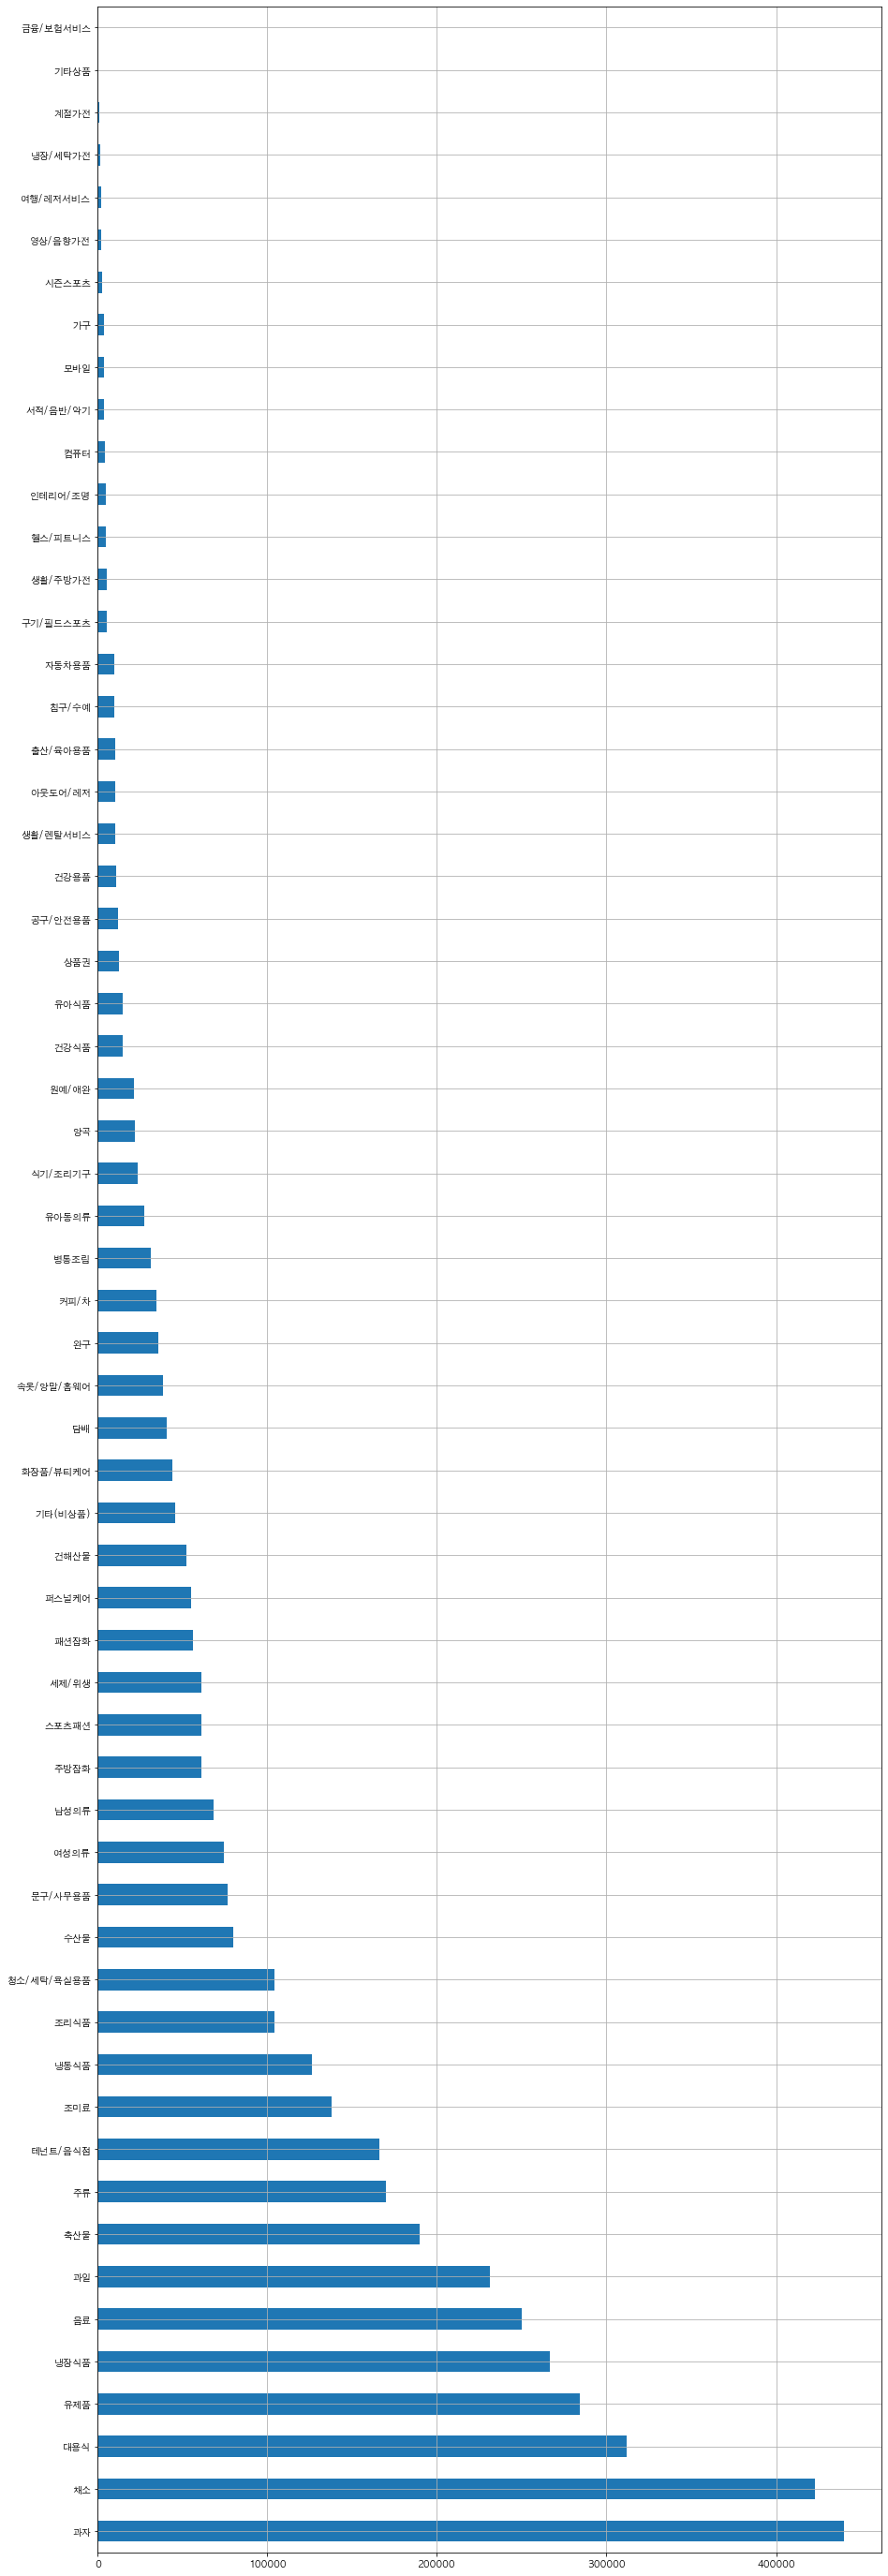

In [11]:
#전체 고객 대상 상품 카테고리 대분류 확인

df_total['clac_hlv_nm'].value_counts().plot.barh(figsize=(15,50), grid = True)

In [12]:
#요인분석 라이브러리 import

from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer




In [13]:
#고객 번호별 상품카테고리 대분류 구매 수


df_factor = pd.DataFrame(df_total.groupby(['cust', 'clac_hlv_nm'], as_index=False)['pd_c'].count())
df_factor.rename(columns = {'pd_c' : 'count' }, inplace = True)
df_factor

,cust,clac_hlv_nm,count
0,M000034966,건해산물,1
1,M000034966,과일,3
2,M000034966,과자,9
3,M000034966,냉동식품,1
4,M000034966,대용식,1
...,...,...,...
496488,M999962961,커피/차,5
496489,M999962961,테넌트/음식점,3
496490,M999962961,패션잡화,5
496491,M999962961,퍼스널케어,7


In [14]:
#고객번호 기준 상품카테고리 대분류별 구매 횟수

df_factor_2 = df_factor.pivot("cust", "clac_hlv_nm", "count")
df_factor_2=df_factor_2.reset_index()
df_factor_2.head()

clac_hlv_nm,cust,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
0,M000034966,NaN,NaN,NaN,1.0,NaN,NaN,3.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M000136117,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,2.0,9.0,3.0,3.0,2.0
2,M000201112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M000225114,NaN,NaN,NaN,NaN,NaN,NaN,10.0,38.0,NaN,...,9.0,NaN,NaN,NaN,NaN,8.0,4.0,NaN,NaN,7.0
4,M000261625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,3.0,7.0,NaN,27.0


In [15]:
#결측치 0으로 대체

df_factor_2=df_factor_2.fillna(0)
df_factor_2

clac_hlv_nm,cust,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
0,M000034966,0.0,0.0,0.0,1.0,0.0,0.0,3.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M000136117,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,2.0,9.0,3.0,3.0,2.0
2,M000201112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M000225114,0.0,0.0,0.0,0.0,0.0,0.0,10.0,38.0,0.0,...,9.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,0.0,7.0
4,M000261625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.0,3.0,7.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26913,M999673157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0
26914,M999770689,0.0,2.0,1.0,0.0,0.0,0.0,4.0,65.0,0.0,...,3.0,0.0,0.0,7.0,0.0,20.0,2.0,0.0,0.0,0.0
26915,M999849895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,...,2.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0


In [16]:
# id 열 추가

id = list(range(1, 26918))
df_factor_2.insert(0, 'id', id)

In [17]:
df_factor_2.head()

clac_hlv_nm,id,cust,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
0,1,M000034966,0.0,0.0,0.0,1.0,0.0,0.0,3.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,M000136117,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,8.0,0.0,0.0,2.0,9.0,3.0,3.0,2.0
2,3,M000201112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,M000225114,0.0,0.0,0.0,0.0,0.0,0.0,10.0,38.0,...,9.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,0.0,7.0
4,5,M000261625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,19.0,3.0,7.0,0.0,27.0


In [18]:
df_factor_2.columns

Index(['id', 'cust', '가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일',
       '과자', '구기/필드스포츠', '금융/보험서비스', '기타(비상품)', '기타상품', '남성의류', '냉동식품',
       '냉장/세탁가전', '냉장식품', '담배', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권',
       '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물', '스포츠패션',
       '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스', '영상/음향가전',
       '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명', '자동차용품', '조리식품',
       '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물', '출산/육아용품', '침구/수예',
       '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어', '헬스/피트니스', '화장품/뷰티케어'],
      dtype='object', name='clac_hlv_nm')

In [19]:
#cust 삭제

df_factor_3 = df_factor_2.drop(['cust'], axis = 1)
df_factor_3


clac_hlv_nm,id,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
0,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,2.0,9.0,3.0,3.0,2.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,10.0,38.0,0.0,...,9.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,0.0,7.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.0,3.0,7.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,26913,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26913,26914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0
26914,26915,0.0,2.0,1.0,0.0,0.0,0.0,4.0,65.0,0.0,...,3.0,0.0,0.0,7.0,0.0,20.0,2.0,0.0,0.0,0.0
26915,26916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,...,2.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0


In [20]:
#na값 0으로 대체
df_factor_3 = df_factor_3.fillna(0)
df_factor_3

clac_hlv_nm,id,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
0,1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,2.0,9.0,3.0,3.0,2.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,10.0,38.0,0.0,...,9.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,0.0,7.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.0,3.0,7.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,26913,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26913,26914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0
26914,26915,0.0,2.0,1.0,0.0,0.0,0.0,4.0,65.0,0.0,...,3.0,0.0,0.0,7.0,0.0,20.0,2.0,0.0,0.0,0.0
26915,26916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,...,2.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0


In [21]:
#연관분석

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(25, rotation = None)

fa.fit(df_factor_3)


FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

In [24]:
#카이저 규칙 확인 

ev, v = fa.get_eigenvalues()

ev

array([11.76703763,  3.64527177,  3.08263408,  1.7755817 ,  1.53679913,
        1.46525742,  1.20744955,  1.19254812,  1.12118469,  1.09700339,
        1.03863943,  1.02584062,  1.01489726,  1.01070992,  0.99251538,
        0.97732847,  0.97347503,  0.94568022,  0.94043517,  0.90873341,
        0.90478357,  0.88984966,  0.87754759,  0.86822761,  0.84669702,
        0.82095506,  0.7923201 ,  0.78888873,  0.78055935,  0.75522377,
        0.75080006,  0.72918208,  0.70849288,  0.70660494,  0.69124562,
        0.65766571,  0.62655673,  0.60889594,  0.59303148,  0.58141882,
        0.57256769,  0.55692709,  0.5449956 ,  0.52643525,  0.5240963 ,
        0.51754861,  0.49119611,  0.481517  ,  0.46028892,  0.42855638,
        0.39685204,  0.38654506,  0.34663106,  0.34342347,  0.32479113,
        0.27569244,  0.26816083,  0.26301548,  0.21522519,  0.19420219,
        0.18336305])

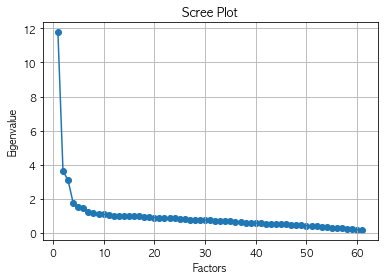

In [25]:
plt.scatter(range(1,df_factor_3.shape[1]+1),ev)
plt.plot(range(1,df_factor_3.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#4개 인자

In [26]:
#요인분석 실시

fa = FactorAnalyzer(4,rotation="varimax" )
fa.fit(df_factor_3)


FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [27]:
factor_result_2 = pd.DataFrame(fa.loadings_, index = df_factor_3.columns)
factor_result_2

,0,1,2,3
clac_hlv_nm,,,,
id,-0.003266,-0.005307,-0.004693,-0.007775
가구,0.065018,-0.004803,0.225394,0.079524
건강식품,0.210219,0.047980,0.231955,0.052741
건강용품,0.170149,0.576460,0.146550,0.118907
건해산물,0.758134,0.053397,0.041766,0.104452
...,...,...,...,...
테넌트/음식점,0.181093,0.054968,0.446937,0.195210
패션잡화,0.023784,0.022064,0.513286,0.145624
퍼스널케어,0.575661,0.202230,0.208511,0.185111


In [28]:
#데이터프레임화

factor_result_2= factor_result_2.reset_index()
factor_result_2.head()

,clac_hlv_nm,0,1,2,3
0,id,-0.003266,-0.005307,-0.004693,-0.007775
1,가구,0.065018,-0.004803,0.225394,0.079524
2,건강식품,0.210219,0.047980,0.231955,0.052741
3,건강용품,0.170149,0.576460,0.146550,0.118907
4,건해산물,0.758134,0.053397,0.041766,0.104452


In [32]:
#인자 적재값이 0.5 이상인 것만 품목 추출

factor_1 = list(factor_result_2.iloc[: ,0][factor_result_2.iloc[: ,1] > 0.5])
factor_2 = list(factor_result_2.iloc[: ,0][factor_result_2.iloc[: ,2] > 0.5])
factor_3 = list(factor_result_2.iloc[: ,0][factor_result_2.iloc[: ,3] > 0.5])
factor_4 = list(factor_result_2.iloc[: ,0][factor_result_2.iloc[: ,4] > 0.5])

In [31]:
#생필품

factor_1

['건해산물',
 '과일',
 '냉동식품',
 '냉장식품',
 '대용식',
 '병통조림',
 '세제/위생',
 '수산물',
 '양곡',
 '유제품',
 '조미료',
 '주방잡화',
 '채소',
 '청소/세탁/욕실용품',
 '축산물',
 '퍼스널케어']

In [33]:
#기호식품

factor_2

['건강용품', '과자', '냉동식품', '담배', '대용식', '생활/렌탈서비스', '음료', '조리식품', '주류']

In [34]:
#의류

factor_3

['스포츠패션', '여성의류', '패션잡화']

In [35]:
#출산 / 육아용품

factor_4

['출산/육아용품']

True


In [36]:
#factor analytics 데이터프레임화

df_factor = pd.DataFrame({'factor_1': factor_1})
df_factor_2 = pd.DataFrame({'factor_2': factor_2})
df_factor_3 = pd.DataFrame({'factor_3': factor_3})
df_factor_4 = pd.DataFrame({'factor_4': factor_4})

df_factor = pd.concat([df_factor, df_factor_2, df_factor_3, df_factor_4], axis = 1)

df_factor = df_factor.transpose()
df_factor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
factor_1,건해산물,과일,냉동식품,냉장식품,대용식,병통조림,세제/위생,수산물,양곡,유제품,조미료,주방잡화,채소,청소/세탁/욕실용품,축산물,퍼스널케어
factor_2,건강용품,과자,냉동식품,담배,대용식,생활/렌탈서비스,음료,조리식품,주류,NaN,NaN,NaN,NaN,NaN,NaN,NaN
factor_3,스포츠패션,여성의류,패션잡화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
factor_4,출산/육아용품,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#전체 데이터에서 요인별 분포 확인


factor_count = df_total['clac_hlv_nm'].value_counts()

factor_count.head()


과자      440223
채소      423178
대용식     311966
유제품     284420
냉장식품    266481
Name: clac_hlv_nm, dtype: int64

In [38]:
#전체 데이터에서 factor_1 True = 2439244

df_total['clac_hlv_nm'].isin(factor_1).value_counts()

True     2439244
False    1942499
Name: clac_hlv_nm, dtype: int64

In [39]:
#전체 데이터에서 factor_2 True = 1464951

df_total['clac_hlv_nm'].isin(factor_2).value_counts()

False    2916792
True     1464951
Name: clac_hlv_nm, dtype: int64

In [40]:
#전체 데이터에서 factor_3 True = 191857

df_total['clac_hlv_nm'].isin(factor_3).value_counts()

False    4189886
True      191857
Name: clac_hlv_nm, dtype: int64

In [41]:
#전체 데이터에서 factor_4 True = 10188

df_total['clac_hlv_nm'].isin(factor_4).value_counts()

False    4371555
True       10188
Name: clac_hlv_nm, dtype: int64

In [42]:
factor_1_true = 2439244
factor_2_true = 1464951
factor_3_true = 191857
factor_4_true = 10188




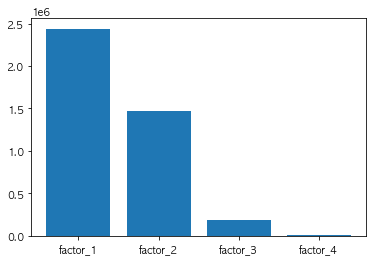

In [43]:
#그래프


y = [2439244,1464951, 191857,10188]
x = ['factor_1', 'factor_2', 'factor_3', 'factor_4']


plt.bar(x, y)
plt.show()

In [27]:
import pickle
import joblib
joblib.dump(fa, './factor.pkl')

['./factor.pkl']